In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error,r2_score
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
df=pd.read_csv('train.csv')
x_test=pd.read_csv('test.csv')

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
x_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
x_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:


ids=x_test['PassengerId']

df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
x_test=x_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

x_test['Age'] = x_test['Age'].fillna(x_test['Age'].median())
x_test['Fare'] = x_test['Fare'].fillna(x_test['Fare'].mean())

categorical_cols = df.select_dtypes(include=['object']).columns


df = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols,dtype=int)
x_test = pd.get_dummies(x_test, columns=categorical_cols, prefix=categorical_cols,dtype=int)


y_train=df['Survived']
df=df.drop(['Survived'],axis=1)

x_train, x_cv, y_train, y_cv = train_test_split(df, y_train,test_size=0.20,random_state=32)


In [8]:
'''
y_train=y_train.to_numpy()
y_train.reshape(-1,1)'''

'\ny_train=y_train.to_numpy()\ny_train.reshape(-1,1)'

In [9]:
model=Sequential([
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(32,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
    
)
# Specify early stopping criteria
#early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=300, batch_size=32,validation_data=(x_cv, y_cv))

Epoch 1/300
23/23 [==============================] - 1s 9ms/step - loss: 3.9675 - accuracy: 0.5590 - val_loss: 1.0366 - val_accuracy: 0.6034
Epoch 2/300
23/23 [==============================] - 0s 3ms/step - loss: 2.9224 - accuracy: 0.5295 - val_loss: 1.0819 - val_accuracy: 0.6425
Epoch 3/300
23/23 [==============================] - 0s 3ms/step - loss: 2.1623 - accuracy: 0.5688 - val_loss: 0.9811 - val_accuracy: 0.6592
Epoch 4/300
23/23 [==============================] - 0s 2ms/step - loss: 2.1354 - accuracy: 0.5576 - val_loss: 0.8363 - val_accuracy: 0.6704
Epoch 5/300
23/23 [==============================] - 0s 3ms/step - loss: 1.4839 - accuracy: 0.5997 - val_loss: 0.7185 - val_accuracy: 0.6872
Epoch 6/300
23/23 [==============================] - 0s 3ms/step - loss: 1.3832 - accuracy: 0.6039 - val_loss: 0.7057 - val_accuracy: 0.6704
Epoch 7/300
23/23 [==============================] - 0s 3ms/step - loss: 1.1424 - accuracy: 0.6180 - val_loss: 0.6966 - val_accuracy: 0.6704
Epoch 8/300
2

In [10]:
# Get the best weights from the model
best_weights = model.get_weights()

# Reset the model to its initial weights
model.reset_states()

# Set the best weights to the model
model.set_weights(best_weights)

In [11]:
print(model.evaluate(x_cv,y_cv))
print(model.evaluate(x_train,y_train))

6/6 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.8268
[0.45164668560028076, 0.826815664768219]
23/23 [==============================] - 0s 955us/step - loss: 0.3813 - accuracy: 0.8455
[0.38131603598594666, 0.8455055952072144]


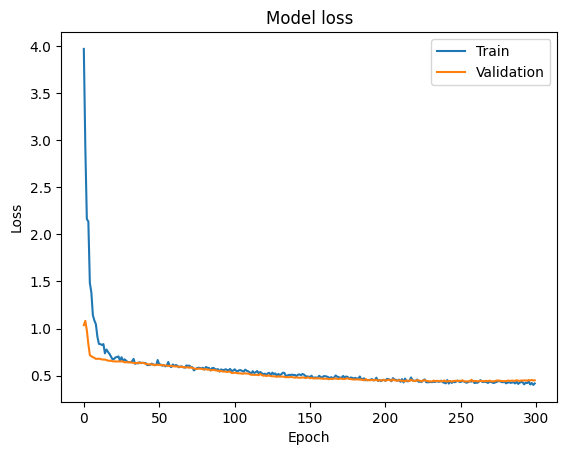

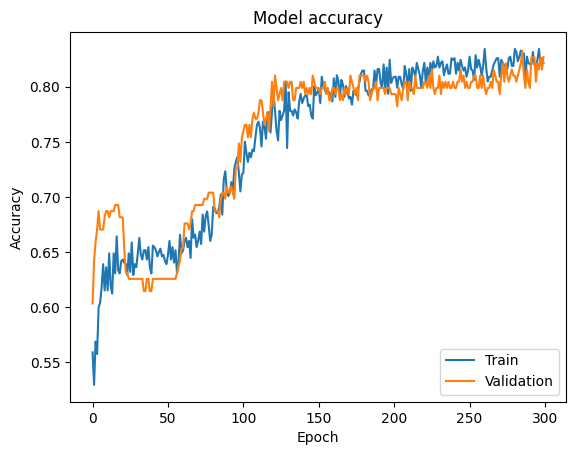

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

6/6 [==============================] - 0s 1ms/step


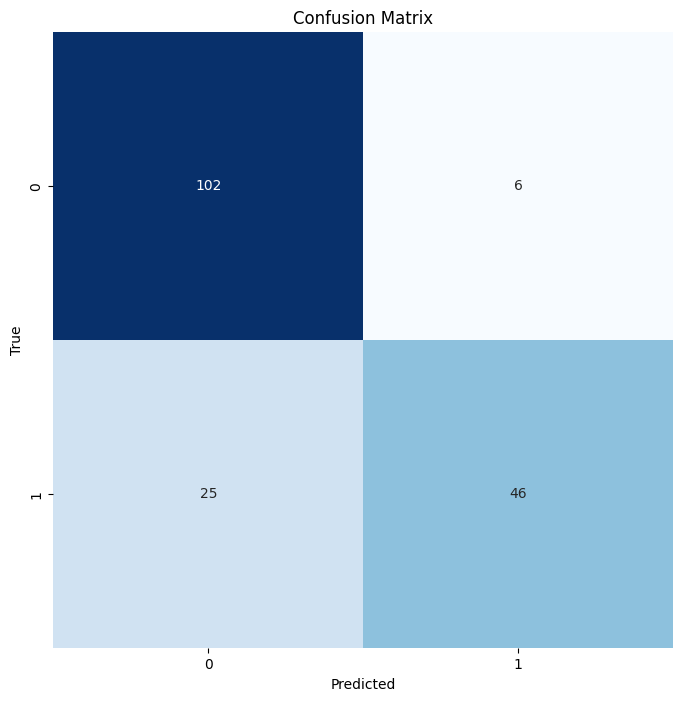

In [19]:
predictions = model.predict(x_cv)
for i in range(predictions.shape[0]):
    if predictions[i]>0.5:
        predictions[i]=1
    else:
        predictions[i]=0

# Compute confusion matrix
cm = confusion_matrix(y_cv, predictions)

# Plot confusion matrix using seaborn
class_names = [str(i) for i in range(2)]  
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
y_pred=model.predict(x_test)
for i in range(y_pred.shape[0]):
    if y_pred[i]>0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
        
y_pred=y_pred.ravel()
y_pred=y_pred.astype(int)    
print(y_pred)

14/14 [==============================] - 0s 923us/step
[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [16]:

ids=list(ids)
submit=pd.DataFrame({'PassengerId':ids,'Survived':y_pred})
print(submit)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [17]:
#submit.to_csv('submit4.csv',index=False)

In [18]:
#model.save('model0.h5')